In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data = {
    'review': [
        'I love this product!',
        'Absolutely terrible experience.',
        'Very satisfied and happy.',
        'Worst thing I ever bought.',
        'It works well, I like it.',
        'Do not waste your money!',
        'Highly recommend to everyone.',
        'Poor quality and rude support.',
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
}

import pandas as pd
df = pd.DataFrame(data)
df.head()


,review,sentiment
0,I love this product!,1
1,Absolutely terrible experience.,0
2,Very satisfied and happy.,1
3,Worst thing I ever bought.,0
4,"It works well, I like it.",1


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



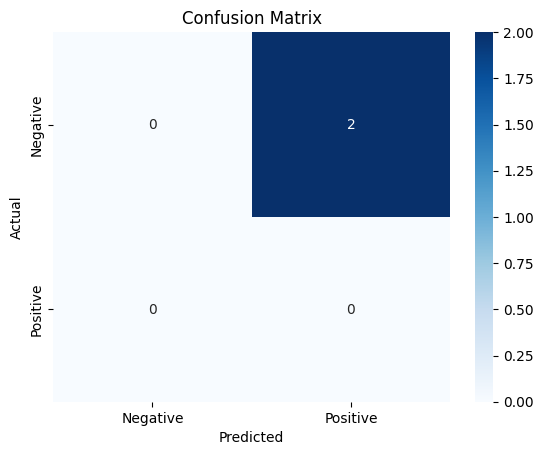

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


